In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Wrangle function
def wrangle(filename):
    # Import CSV 
    df = pd.read_csv(filename)
    
    #Drop multicollinearity columns
    df.drop(columns=["cigsPerDay", "sysBP"], inplace=True)
    
    # Convert target to bool
    df["TenYearCulmunaryheartdisease"] = df["TenYearCHD"].astype(bool)
    
    #Drop column
    df.drop(columns="TenYearCHD", inplace=True)
    
    return df

In [3]:
df = wrangle("heart disease.csv")
df.head()

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCulmunaryheartdisease
0,1,39,4.0,0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0,False
1,0,46,2.0,0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0,False
2,1,48,1.0,1,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0,False
3,0,61,3.0,1,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0,True
4,0,46,3.0,1,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   male                          4238 non-null   int64  
 1   age                           4238 non-null   int64  
 2   education                     4133 non-null   float64
 3   currentSmoker                 4238 non-null   int64  
 4   BPMeds                        4185 non-null   float64
 5   prevalentStroke               4238 non-null   int64  
 6   prevalentHyp                  4238 non-null   int64  
 7   diabetes                      4238 non-null   int64  
 8   totChol                       4188 non-null   float64
 9   diaBP                         4238 non-null   float64
 10  BMI                           4219 non-null   float64
 11  heartRate                     4237 non-null   float64
 12  glucose                       3850 non-null   float64
 13  Ten

In [5]:
# Check the percentage of null values in each column
df.isnull().sum() / len(df)

male                            0.000000
age                             0.000000
education                       0.024776
currentSmoker                   0.000000
BPMeds                          0.012506
prevalentStroke                 0.000000
prevalentHyp                    0.000000
diabetes                        0.000000
totChol                         0.011798
diaBP                           0.000000
BMI                             0.004483
heartRate                       0.000236
glucose                         0.091553
TenYearCulmunaryheartdisease    0.000000
dtype: float64

In [6]:
# multicollinearity between numerical columns
corr = df.select_dtypes("number").corr()
corr

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose
male,1.000000,-0.028979,0.017352,0.197596,-0.052506,-0.004546,0.005313,0.015708,-0.070322,0.057933,0.081672,-0.116620,0.006083
age,-0.028979,1.000000,-0.165883,-0.213748,0.122995,0.057655,0.307194,0.101258,0.262131,0.206104,0.135800,-0.012823,0.122256
education,0.017352,-0.165883,1.000000,0.018532,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.062316,-0.137504,-0.054206,-0.035721
currentSmoker,0.197596,-0.213748,0.018532,1.000000,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.107746,-0.167650,0.062356,-0.056826
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,1.000000,0.117365,0.261187,0.052047,0.080558,0.194227,0.100668,0.015233,0.051176
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,0.117365,1.000000,0.074830,0.006949,0.000067,0.045190,0.025891,-0.017676,0.018431
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,0.261187,0.074830,1.000000,0.077808,0.163993,0.615751,0.301318,0.147261,0.086834
diabetes,0.015708,0.101258,-0.038680,-0.044295,0.052047,0.006949,0.077808,1.000000,0.040278,0.050329,0.087036,0.048994,0.617627
totChol,-0.070322,0.262131,-0.023115,-0.046562,0.080558,0.000067,0.163993,0.040278,1.000000,0.165182,0.115767,0.091125,0.046408
diaBP,0.057933,0.206104,-0.062316,-0.107746,0.194227,0.045190,0.615751,0.050329,0.165182,1.000000,0.377588,0.181255,0.061231


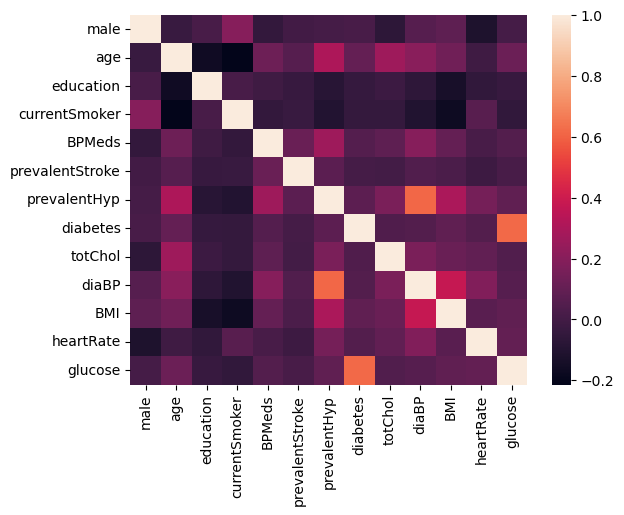

In [7]:
# Plot a heat map to show correllation matrix
sns.heatmap(corr);

In [8]:
# Convert target to bool
#df["TenYearCHD"].astype(bool)

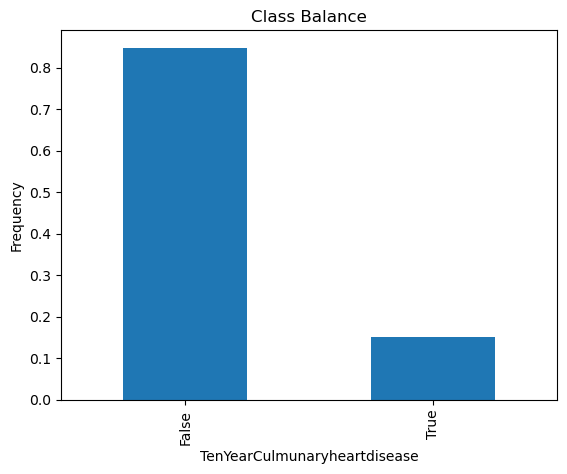

In [9]:
# Plot class balance
df["TenYearCulmunaryheartdisease"].value_counts(normalize=True)
df["TenYearCulmunaryheartdisease"].value_counts(normalize=True).plot(kind="bar");

plt.xlabel("TenYearCulmunaryheartdisease")
plt.ylabel("Frequency")
plt.title("Class Balance");

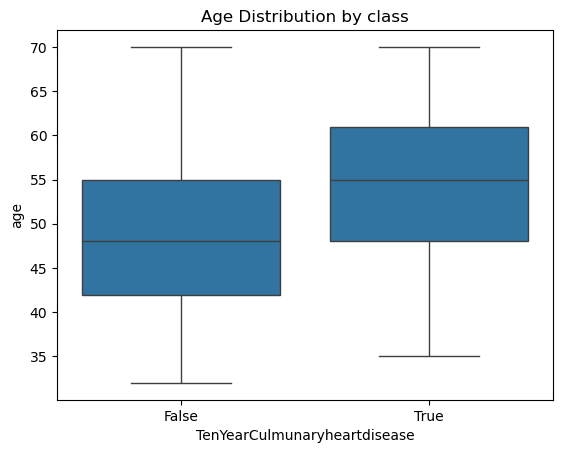

In [10]:
# Check the distribution of age accross heart disease result
sns.boxplot(x="TenYearCulmunaryheartdisease", y="age", data=df )

plt.xlabel("TenYearCulmunaryheartdisease")
plt.ylabel("age")
plt.title("Age Distribution by class");

In [11]:
majority_class, minority_class = df["TenYearCulmunaryheartdisease"].value_counts(normalize=True)
print(majority_class, minority_class)

0.8480415290231241 0.1519584709768759


In [12]:
age_pivot = pd.pivot_table(
    df, index= "age", values="TenYearCulmunaryheartdisease", aggfunc=np.mean
).sort_values(by="TenYearCulmunaryheartdisease")
age_pivot.head()

,TenYearCulmunaryheartdisease
age,
32,0.000000
33,0.000000
34,0.000000
39,0.035503
36,0.035714


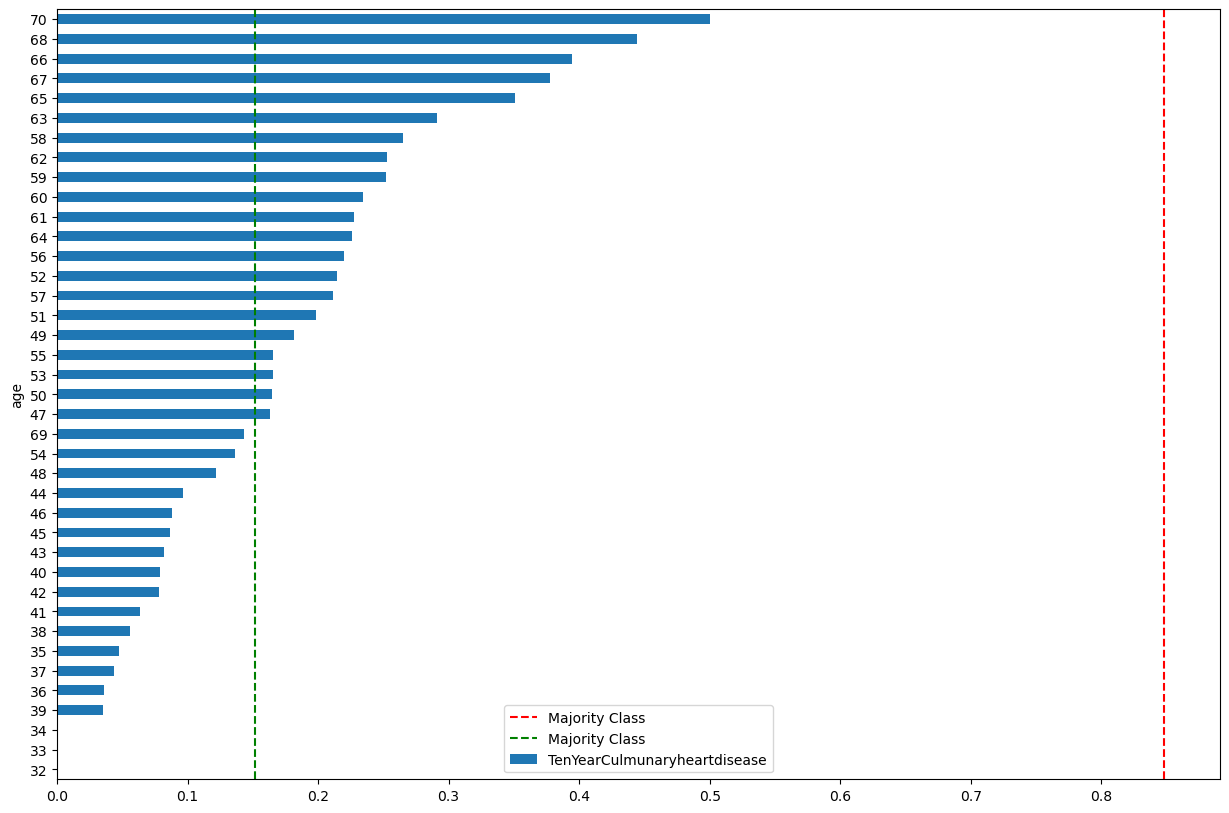

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
age_pivot.plot(kind="barh", ax=ax)

plt.axvline(
    majority_class, linestyle="--", color="Red", label="Majority Class"
)

plt.axvline(
    minority_class, linestyle="--", color="Green", label="Majority Class"
);

plt.legend();

In [14]:
# Split the data into features and target
target = "TenYearCulmunaryheartdisease"

X = df.drop(columns="TenYearCulmunaryheartdisease")
y= df[target]

print("X:", X.shape)
print("y:", y.shape)

X: (4238, 13)
y: (4238,)


In [15]:
# Split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3390, 13)
y_train: (3390,)
X_test: (848, 13)
y_test: (848,)


In [16]:
# test the  functionability of train test split
len(X_train + X_test) ==len(X)
len(y_train + y_test) == len(y)

True

In [17]:
# Set baseline accuracy
training_accuracy_score = y_train.value_counts(normalize=True).max()
print(f"Baseline_accuracy_score:", round(training_accuracy_score, 2))

Baseline_accuracy_score: 0.85


In [18]:
model = make_pipeline(
    SimpleImputer(),
    LogisticRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [19]:
# Evaluate the training accuracy
acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy:", round(acc_train, 2))

Training Accuracy: 0.85


In [20]:
#Evaluate the test accuracy
acc_test = model.score(X_test, y_test)
print(f"Test Accuracy:", round(acc_test, 2))

Test Accuracy: 0.85


In [21]:
model.predict(X_test)[:5]

array([False, False, False, False, False])

In [22]:
model.predict_proba(X_test)[:5]

array([[0.56828324, 0.43171676],
       [0.93056973, 0.06943027],
       [0.84762886, 0.15237114],
       [0.91039244, 0.08960756],
       [0.91996392, 0.08003608]])

In [23]:
Importance  = model.named_steps["logisticregression"].coef_[0]
Importance

array([ 0.4145051 ,  0.03823087, -0.12237569,  0.18333861,  0.22654978,
        0.0681048 ,  1.08117878,  0.15786481, -0.0016351 , -0.00807921,
       -0.05549388, -0.02273162,  0.00590634])

In [26]:
feat_imp= pd.DataFrame(np.exp(Importance), index=X_train.columns)
feat_imp

,0
male,1.513621
age,1.038971
education,0.884816
currentSmoker,1.201221
BPMeds,1.254265
prevalentStroke,1.070477
prevalentHyp,2.948153
diabetes,1.171008
totChol,0.998366
diaBP,0.991953


In [27]:
feature_importance = feat_imp.squeeze(axis=0).sort_values()
feature_importance 

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [28]:
odd_ratio =feature_importance 

NameError: name 'feature_importance' is not defined

In [ ]:
odd_ratio.plot(
    kind="barh"
    
);